In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow 
from scipy.fftpack import dct, idct
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import pywt

In [2]:
image3_path = '/content/drive/MyDrive/Digital Image Processing/HW3/3.jpg'

In [3]:
image3 = cv2.imread(image3_path,0)

In [4]:
image3.shape

(885, 885)

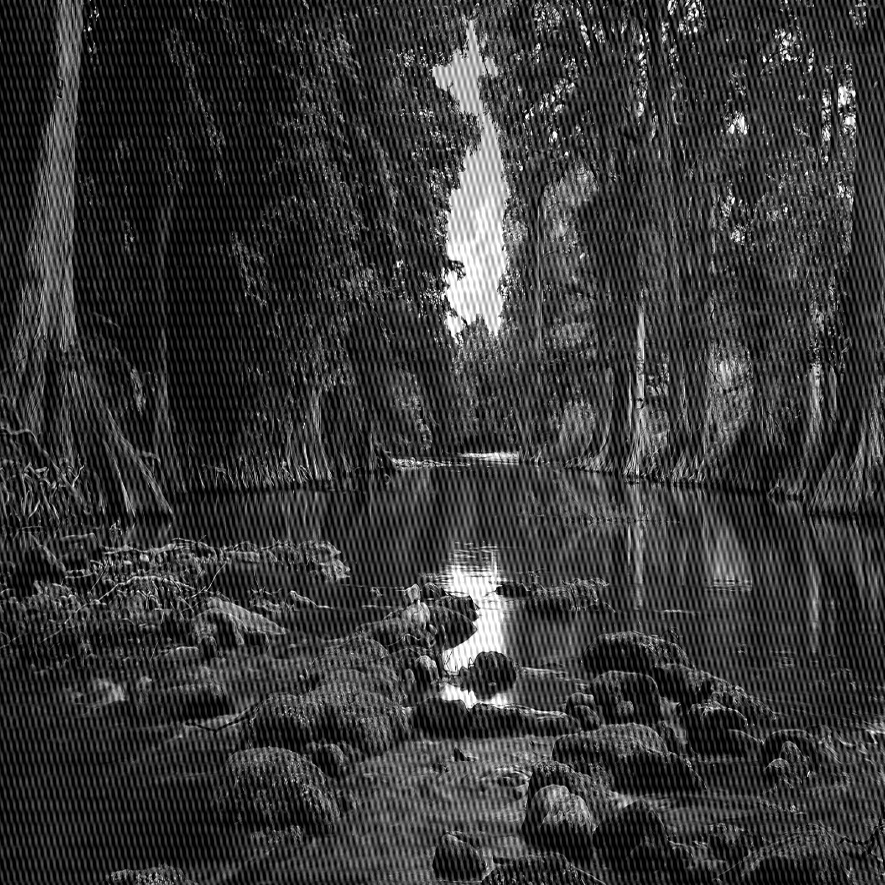

In [5]:
cv2_imshow(image3)

In [6]:
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

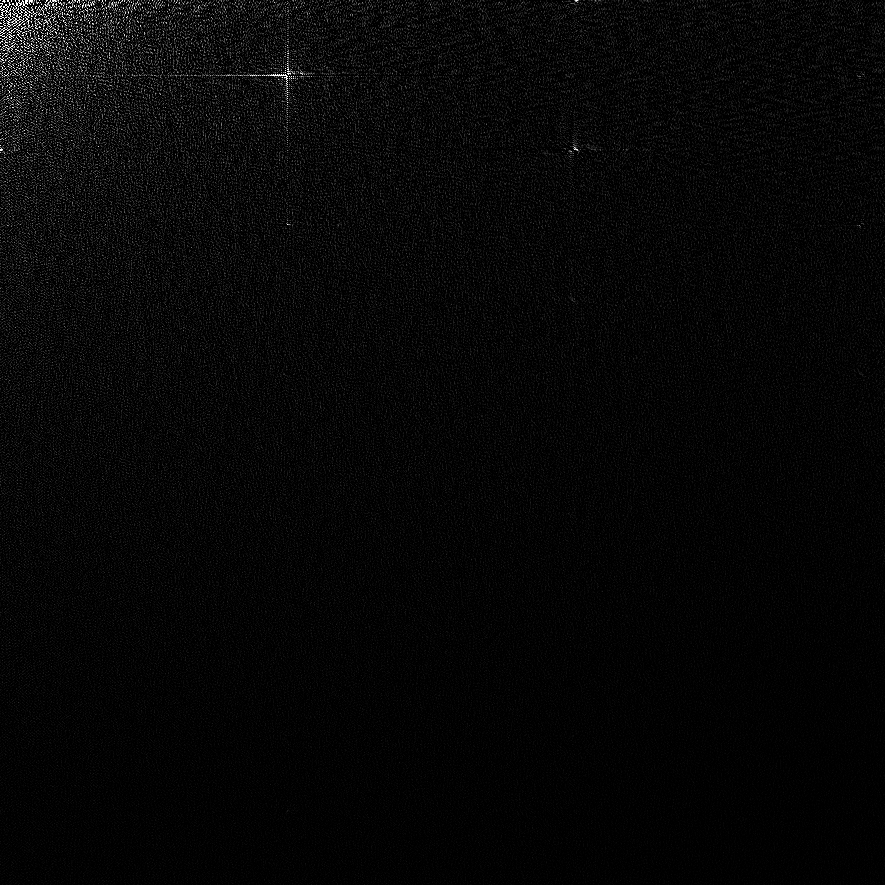

In [7]:
img3_dct = dct2(image3)
# img3_dct = cv2.dct(np.float32(image3)/255.0)
cv2_imshow(img3_dct)

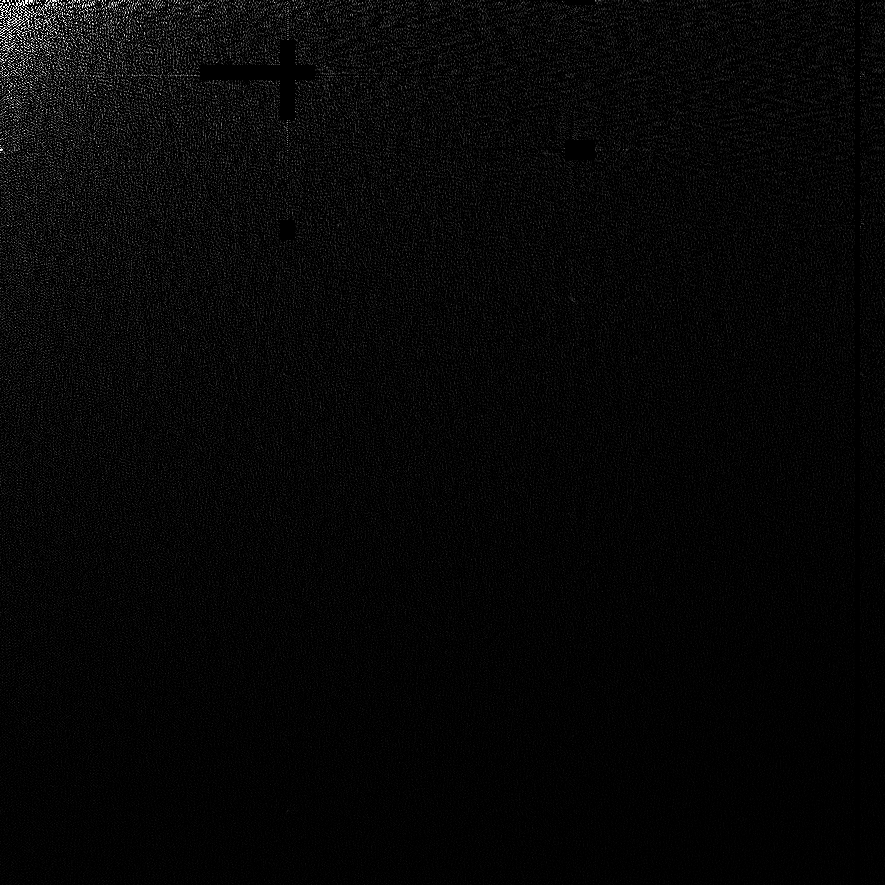

In [8]:
# img3_dct[np.abs(img3_dct) > 50] = 0
filter = np.ones(img3_dct.shape)
# filter[60:, 260:] = 0
filter[65:80, 200:315] = 0

filter[40:120, 280:295] = 0
filter[220:240, 280:295] = 0
filter[140:160, 565:595] = 0
filter[0:5, 565:595] = 0
filter[:, -30:-25] = 0
img3_dct_filtered = np.multiply(img3_dct, filter)
cv2_imshow(img3_dct_filtered)

In [9]:
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')  

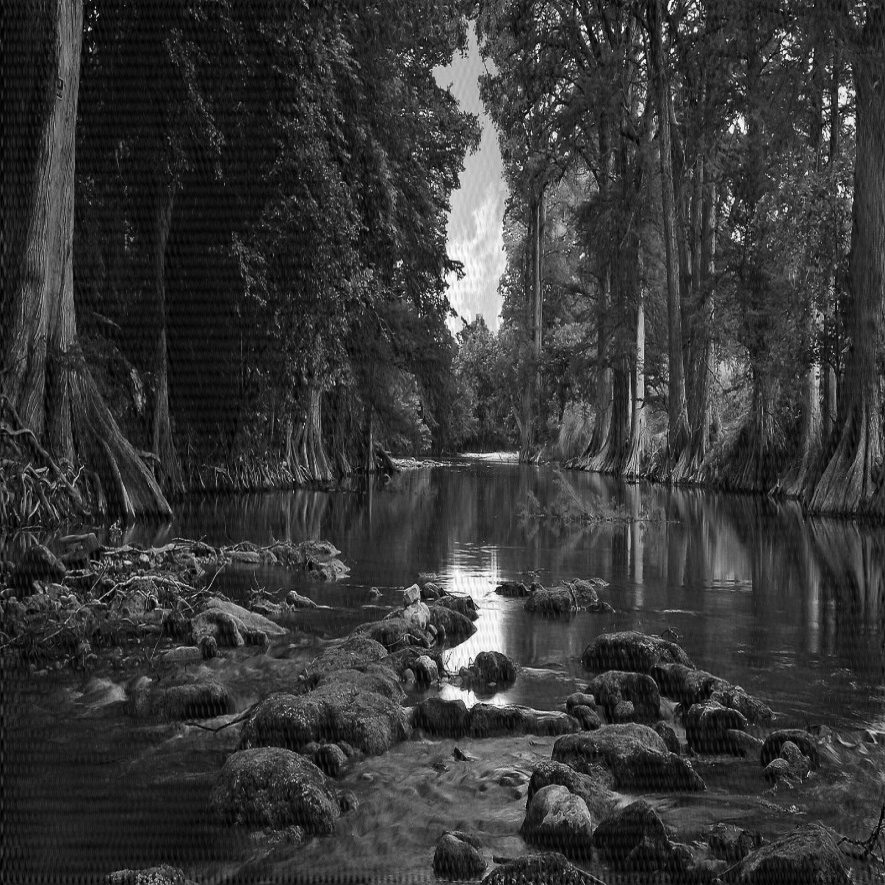

In [10]:
img3_idct = idct2(img3_dct_filtered)
cv2_imshow(img3_idct)

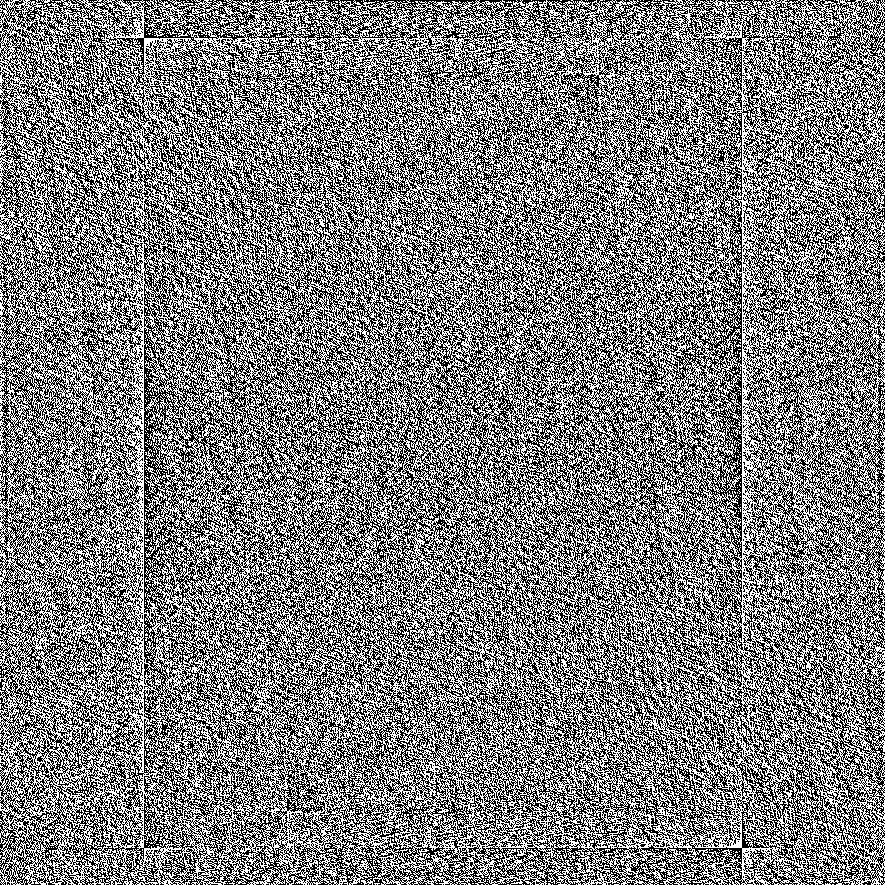

In [11]:
img3_dft = np.fft.fft2(image3)
# dft = cv2.dft(np.float32(image3),flags = cv2.DFT_COMPLEX_OUTPUT)
img3_dft_real = img3_dft.real
img3_dft_img = img3_dft.imag
cv2_imshow(img3_dft_real)

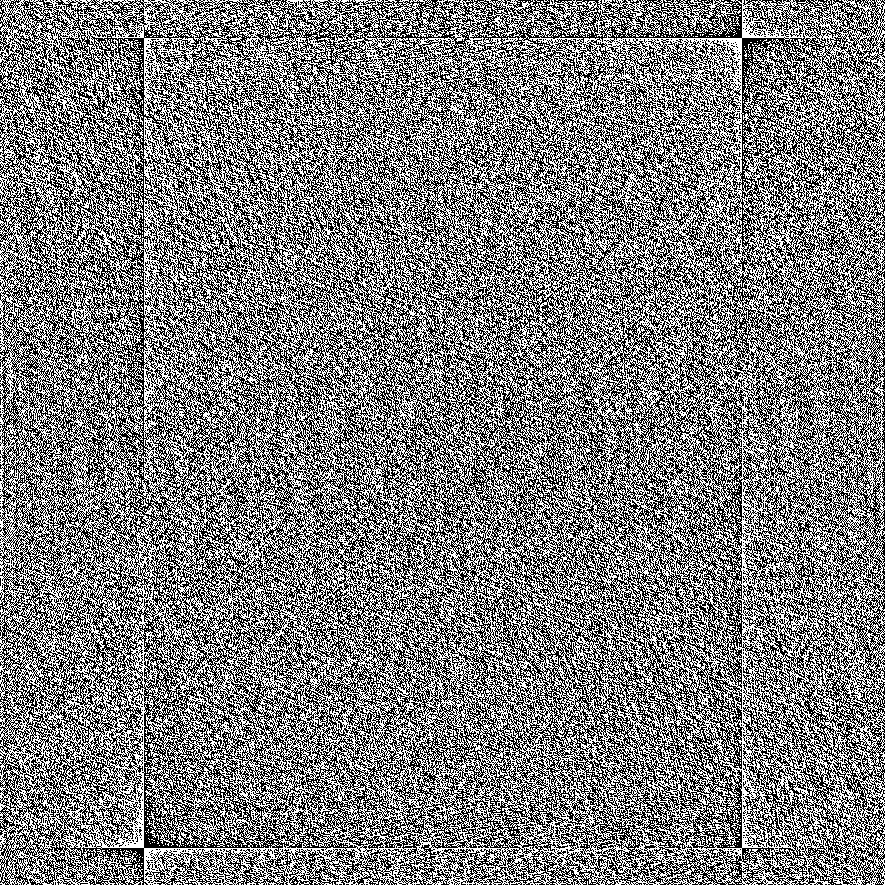

In [12]:
cv2_imshow(img3_dft_img)

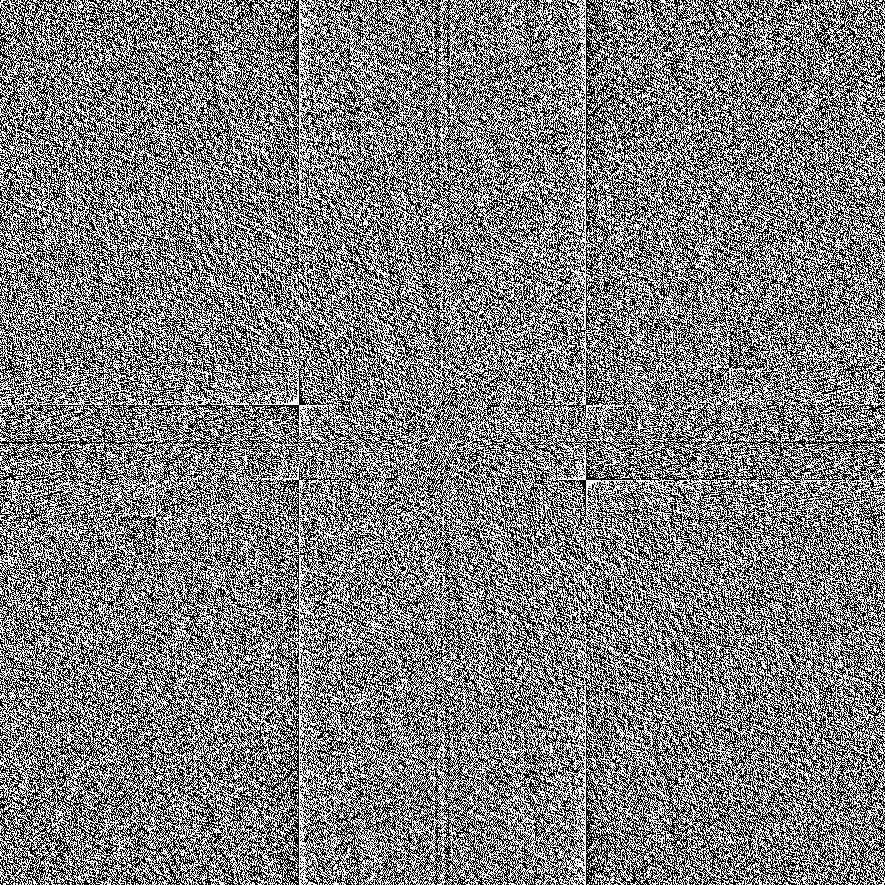

In [13]:
img3_dft_shifted = np.fft.fftshift(img3_dft)
img3_dft_shifted_real = img3_dft_shifted.real
img3_dft_shifted_img = img3_dft_shifted.imag
cv2_imshow(img3_dft_shifted_real)

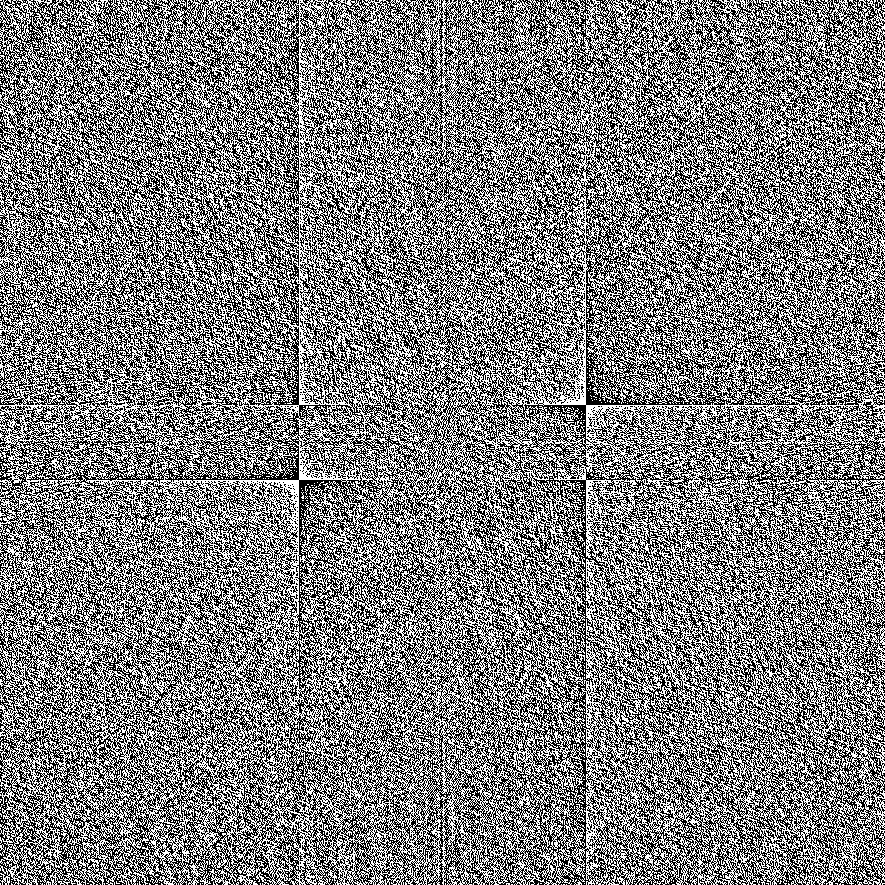

In [14]:
cv2_imshow(img3_dft_shifted_img)

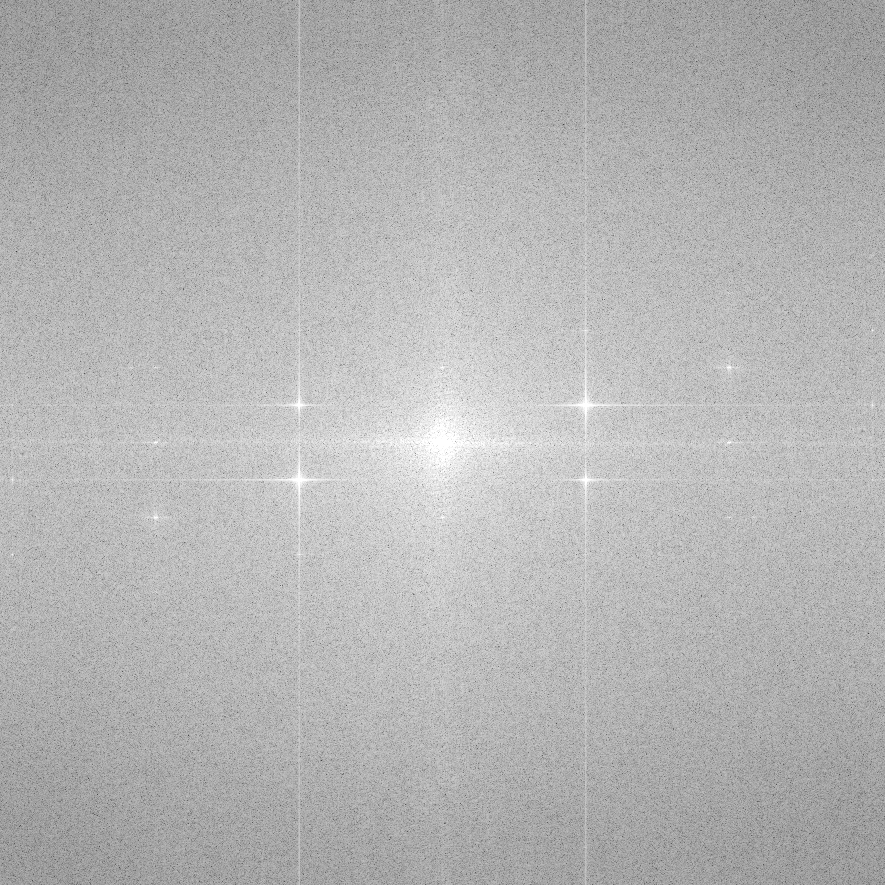

In [15]:
magnitude_spectrum = 20*np.log(np.abs(img3_dft_shifted))
# magnitude_spectrum_real = magnitude_spectrum.real
# magnitude_spectrum_img = magnitude_spectrum.imag
cv2_imshow(magnitude_spectrum)


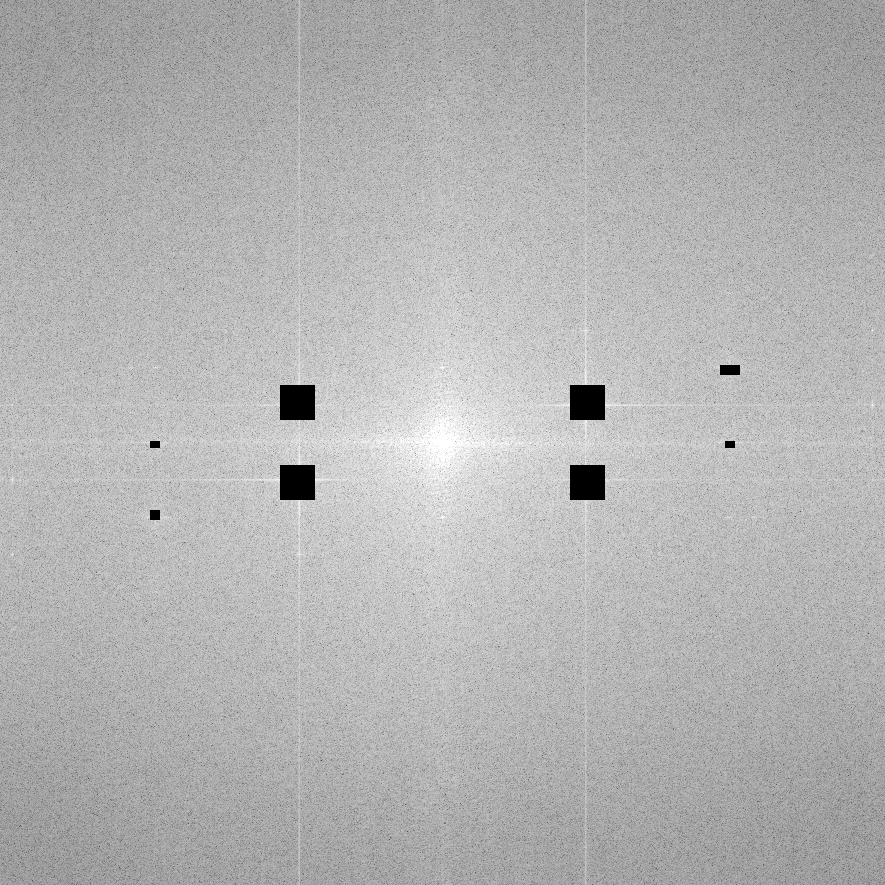

In [16]:
dft_filter = np.ones(magnitude_spectrum.shape)
dft_filter[385:420, 280:315] = 0
dft_filter[465:500, 280:315] = 0
dft_filter[385:420, 570:605] = 0
dft_filter[465:500, 570:605] = 0

# dft_filter[:, 297:300] = 0
# dft_filter[:, 584:587] = 0

# dft_filter[402:405, :] = 0
# dft_filter[481:484, :] = 0


dft_filter[365:375, 720:740] = 0
dft_filter[510:520, 150:160] = 0

dft_filter[441:448, 725:735] = 0
dft_filter[441:448, 150:160] = 0

magnitude_spectrum_filtered = np.multiply(magnitude_spectrum, dft_filter)
cv2_imshow(magnitude_spectrum_filtered)

In [17]:
img3_dft_shifted_filtered = np.multiply(img3_dft_shifted, dft_filter)

In [18]:
img3_dft_inverse_shifted_filtered = np.fft.fftshift(img3_dft_shifted_filtered)

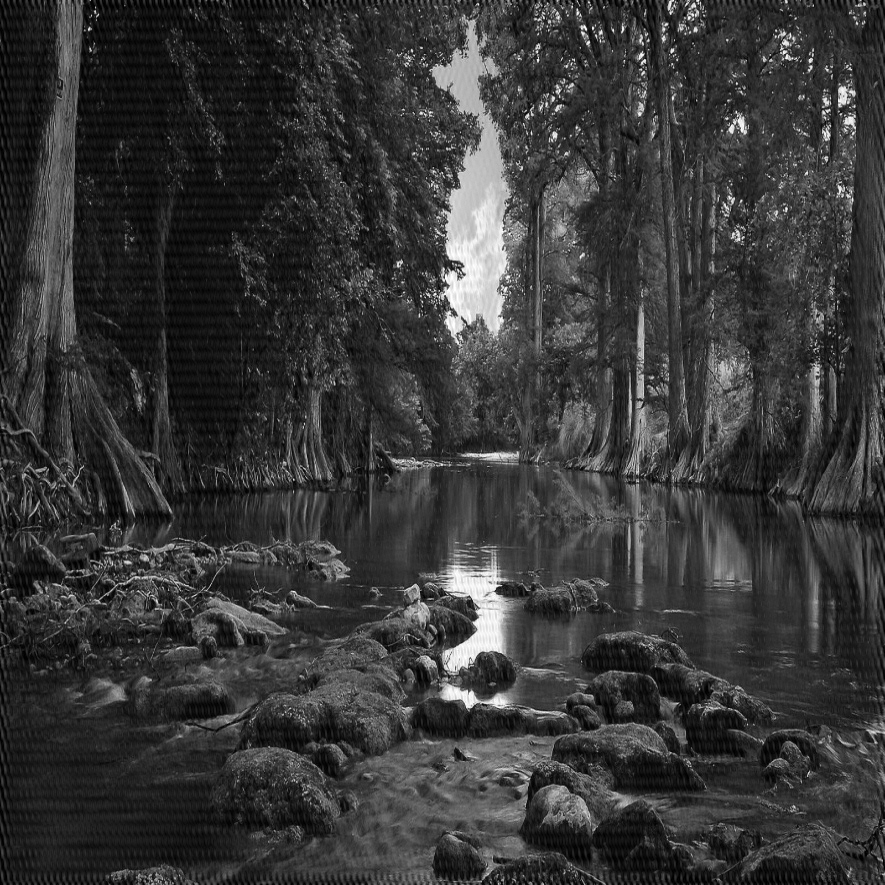

In [19]:
img3_dft_inversed = np.fft.ifft2(img3_dft_inverse_shifted_filtered)
img_back = np.abs(img3_dft_inversed)

cv2_imshow(img_back)

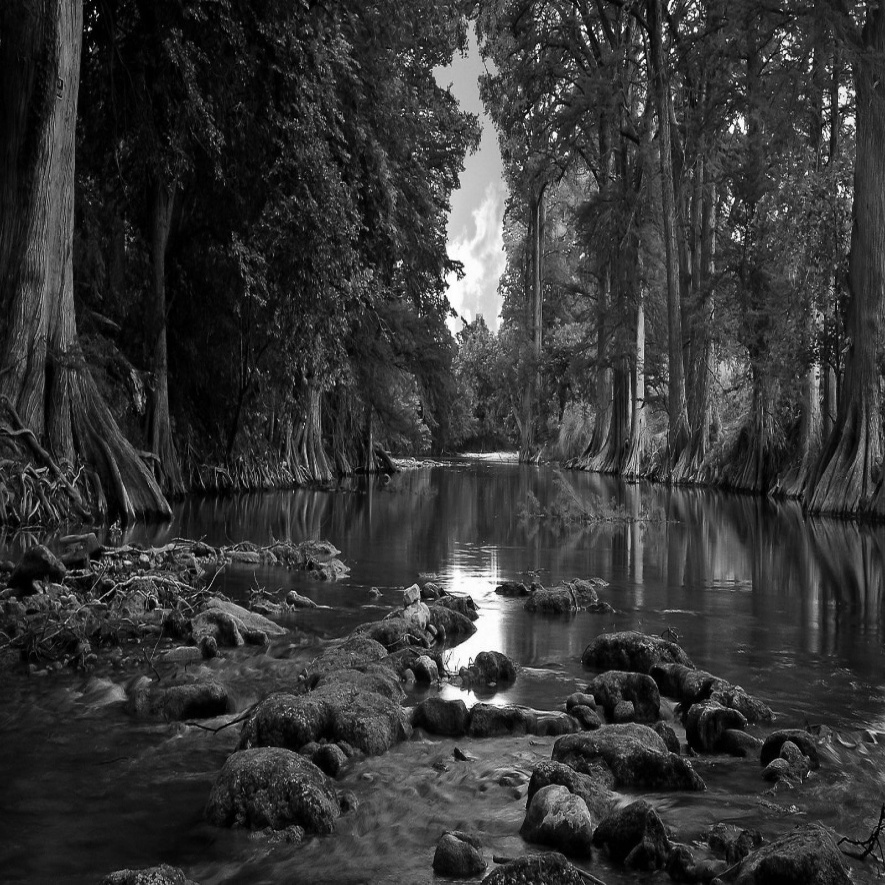

In [20]:
real3_path = '/content/drive/MyDrive/Digital Image Processing/HW3/real_3.jpg'
real3_image = cv2.imread(real3_path, 0)
cv2_imshow(real3_image)


In [21]:
print('MSE: ', mean_squared_error(real3_image, image3))
print('PSNR: ', peak_signal_noise_ratio(real3_image, image3))
print('SSIM: ', structural_similarity(real3_image, image3))

MSE:  826.2616361837275
PSNR:  18.959627721929138
SSIM:  0.35383434247312506


In [22]:
data_range = max(np.max(real3_image), np.max(img3_idct)) - min(np.max(real3_image), np.min(img3_idct))
# print(data_range)
print('MSE: ', mean_squared_error(real3_image, img3_idct))
print('PSNR: ', peak_signal_noise_ratio(real3_image, img3_idct, data_range=data_range))
print('SSIM: ', structural_similarity(real3_image, img3_idct, data_range=data_range))

MSE:  50.05199027604082
PSNR:  31.804154767263523
SSIM:  0.880338170048722


In [23]:
data_range = max(np.max(real3_image), np.max(img_back)) - min(np.max(real3_image), np.min(img_back))
# print(data_range)
print('MSE: ', mean_squared_error(real3_image, img_back))
print('PSNR: ', peak_signal_noise_ratio(real3_image, img_back, data_range=data_range))
print('SSIM: ', structural_similarity(real3_image, img_back, data_range=data_range))

MSE:  60.3094116062718
PSNR:  30.90443754664786
SSIM:  0.8699902985912481


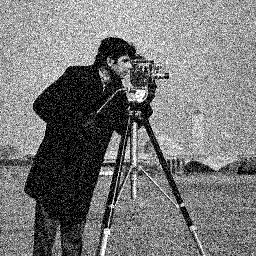

In [24]:
image4_path = '/content/drive/MyDrive/Digital Image Processing/HW3/4.bmp'
image4 = cv2.imread(image4_path, 0)
cv2_imshow(image4)

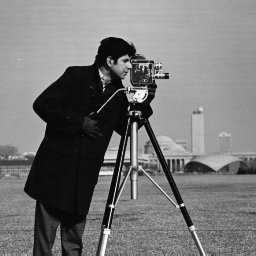

In [25]:
real4_path = '/content/drive/MyDrive/Digital Image Processing/HW3/real_4.bmp'
real4 = cv2.imread(real4_path, 0)
cv2_imshow(real4)

In [26]:
print('MSE: ', mean_squared_error(real4, image4))
print('PSNR: ', peak_signal_noise_ratio(real4, image4))
print('SSIM: ', structural_similarity(real4, image4))

MSE:  1148.8418731689453
PSNR:  17.528201044477505
SSIM:  0.2726788537894845


In [27]:
coeffs = pywt.dwt2(image4, 'haar')
cA, (cH, cV, cD) = coeffs

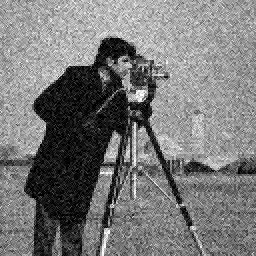

In [28]:
coeffs_of_cA = pywt.idwt2(pywt.dwt2(cA, 'haar'), 'haar')
coeffs = list(coeffs)
coeffs[1] = list(coeffs[1])
coeffs[1][0] = np.zeros(coeffs[1][0].shape)
coeffs[1][1] = np.zeros(coeffs[1][1].shape)
coeffs[1][1] = np.zeros(coeffs[1][2].shape)

# coeffs = cA, (cH, cV, cD)
coeffs[1] = tuple(coeffs[1])
coeffs = tuple(coeffs)
len(coeffs)
wt_image = pywt.idwt2(coeffs, 'haar')
cv2_imshow(wt_image)

In [29]:
data_range = max(np.max(real3_image), np.max(wt_image)) - min(np.max(real3_image), np.min(wt_image))
# print(data_range)
print('MSE: ', mean_squared_error(real4, wt_image))
print('PSNR: ', peak_signal_noise_ratio(real4, wt_image, data_range=data_range))
print('SSIM: ', structural_similarity(real4, wt_image, data_range=data_range))

MSE:  740.3153762817384
PSNR:  19.436635911359023
SSIM:  0.2981858536742139


In [30]:
# wt_image = pywt.idwt2(pywt.dwt2(cA, 'haar'), 'haar')
# cv2_imshow(wt_image)